# Problem statement¶

The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate or false information acquires a tremendous potential to cause real world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. . The sensationalism of not-so-accurate eye catching and intriguing headlines aimed at retaining the attention of audiences to sell information has persisted all throughout the history of all kinds of information broadcast. On social networking websites, the reach and effects of information spread are however significantly amplified and occur at such a fast pace, that distorted, inaccurate or false information acquires a tremendous potential to cause real impacts, within minutes, for millions of user

# import all necessary libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns

from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Deep learning libraries
!pip install tensorflow
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')


# Importing the dataset

In [3]:
# #reading the real news dataset
df_real=pd.read_csv(r"C:\Users\Swati\OneDrive\Desktop\DataScience\Projects\Fake News Classifier\True.csv")
df_real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
# # print shape of fake dataset with rows and columns and information 
df_real.shape

(21417, 4)

In [5]:
# add a label column with value 0 for real news data
df_real['label']=0
df_real

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [6]:

df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


The above output shows that there are no missing values in data

In [7]:
# merge the features 'title' and 'text' to create new feature 'news' 
df_real['news']=df_real['title']+df_real['text']

#drop the original features 'title' and 'text'
df_real=df_real.drop(['title', 'text'], axis=1)



In [8]:
#Removing links and the headline from the date column
df_real=df_real[~df_real.date.str.contains("http")]
df_real=df_real[~df_real.date.str.contains("HOST")]


In [9]:
#Converting the date to datetime format for real news data
df_real['date'] = pd.to_datetime(df_real['date'])

In [10]:
# #reading the fake news dataset
df_fake = pd.read_csv(r"C:\Users\Swati\OneDrive\Desktop\DataScience\Projects\Fake News Classifier\Fake.csv")
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [11]:
# # print shape of fake dataset with rows and columns and information 
df_fake.shape

(23481, 4)

In [12]:
# add a label column with value 1 for real news data
df_fake['label']=1
df_fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [13]:
# lets check for more info 
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [14]:
# merge the features 'title' and 'text' to create new feature 'news' for fake news data
df_fake['news']=df_fake['title']+df_fake['text']

#drop the original features 'title' and 'text' from df_fake
df_fake=df_fake.drop(['title', 'text'], axis=1)

# Rearranging the columns

In [15]:
#Rearranging the columns
df_real = df_real[['subject', 'date', 'news','label']]
df_fake = df_fake[['subject', 'date', 'news','label']]

In [16]:
df_fake['date'].value_counts()

May 10, 2017         46
May 26, 2016         44
May 6, 2016          44
May 5, 2016          44
May 11, 2016         43
                     ..
December 9, 2017      1
December 4, 2017      1
November 19, 2017     1
November 20, 2017     1
Jul 19, 2015          1
Name: date, Length: 1681, dtype: int64

Since there are some links and news headlines in date column of fake news data we have to remove these before converting the date column into datetime feature.

In [17]:
#Removing links and the headline from the date column
df_fake=df_fake[~df_fake.date.str.contains("http")]
df_fake=df_fake[~df_fake.date.str.contains("HOST")]


In [18]:
#Converting the date to datetime format for fake news data
df_fake['date'] = pd.to_datetime(df_fake['date'])

# Combining two datasets

In [19]:
# now lets combine these two datasets to get a single dataframe using pandas concat function to build a model
frames = [df_real, df_fake]
df_news = pd.concat(frames)
df_news

,subject,date,news,label
0,politicsNews,2017-12-31,"As U.S. budget fight looms, Republicans flip t...",0
1,politicsNews,2017-12-29,U.S. military to accept transgender recruits o...,0
2,politicsNews,2017-12-31,Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,politicsNews,2017-12-30,FBI Russia probe helped by Australian diplomat...,0
4,politicsNews,2017-12-29,Trump wants Postal Service to charge 'much mor...,0
...,...,...,...,...
23476,Middle-east,2016-01-16,McPain: John McCain Furious That Iran Treated ...,1
23477,Middle-east,2016-01-16,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,1
23478,Middle-east,2016-01-15,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,1
23479,Middle-east,2016-01-14,How to Blow $700 Million: Al Jazeera America F...,1


# Text Processing

This is an important phase for any text analysis application.There will be many unuseful content in the news which can be an obstacle when feeding to a machine learning model.Unless we remove them the machine learning model doesn't work efficiently. Lets go step by step.

# text cleaning

let's define a function which will convert all text into a lowercase and removes links, punctuations, text containing numbers and text in square brackets

In [20]:
#Creating a copy 
clean_news=df_news.copy()
def review_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
clean_news['news']=clean_news['news'].apply(lambda x:review_cleaning(x))
clean_news.head()

,subject,date,news,label
0,politicsNews,2017-12-31,as us budget fight looms republicans flip thei...,0
1,politicsNews,2017-12-29,us military to accept transgender recruits on ...,0
2,politicsNews,2017-12-31,senior us republican senator let mr mueller do...,0
3,politicsNews,2017-12-30,fbi russia probe helped by australian diplomat...,0
4,politicsNews,2017-12-29,trump wants postal service to charge much more...,0


# stop words

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.
In our project, we are considering the english stop words and removing those words

In [21]:
stop = stopwords.words('english')
clean_news['news'] = clean_news['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,subject,date,news,label
0,politicsNews,2017-12-31,us budget fight looms republicans flip fiscal ...,0
1,politicsNews,2017-12-29,us military accept transgender recruits monday...,0
2,politicsNews,2017-12-31,senior us republican senator let mr mueller jo...,0
3,politicsNews,2017-12-30,fbi russia probe helped australian diplomat ti...,0
4,politicsNews,2017-12-29,trump wants postal service charge much amazon ...,0


# exploratory data analysis

# Countplot of news subject

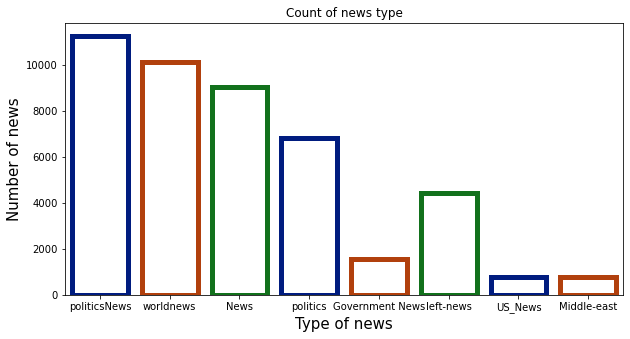

In [22]:
# Plotting the frequency plot for 'subject' feature
ax = sns.countplot(x="subject", data=clean_news,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

#Setting labels and font size
ax.set(xlabel='Type of news', ylabel='Number of news',title='Count of news type')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

Observations :
1. Our dataset has more political news than any other news followed by world news
2. We have some repeated class names which expresses same meaning such as news,politics,government news etc which is similar to    the alternative


# Count of news subject based on real or fake

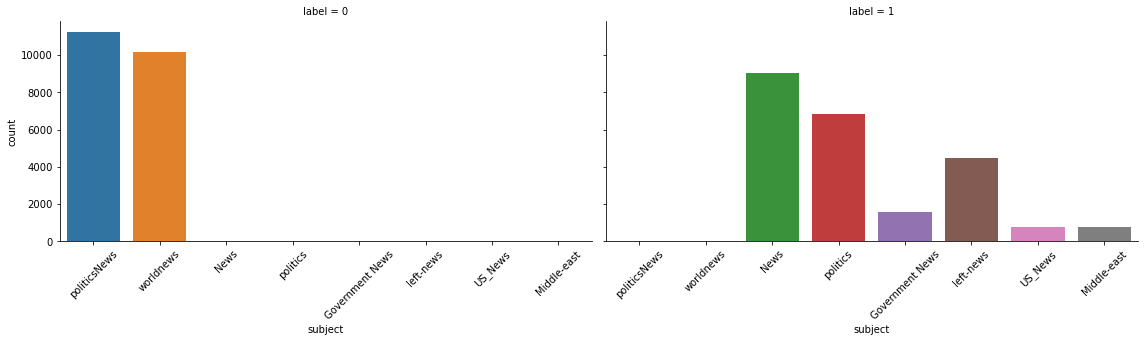

In [23]:
# labelwise countplot for subject
ax = sns.catplot(x="subject", col="label",
                data=clean_news, kind="count",
                height=4, aspect=2)

#Rotating the xlabels
ax.set_xticklabels(rotation=45)


Observations: 
1. Fake news are all over the category except politics and world news
2. True news are present only in politics and world news and the count is high
3. THIS IS A HIGHLY BIASED DATASET and we can expect higher accuracy which doesn't signify it is a good model considering the      poor quality of dataset


# +

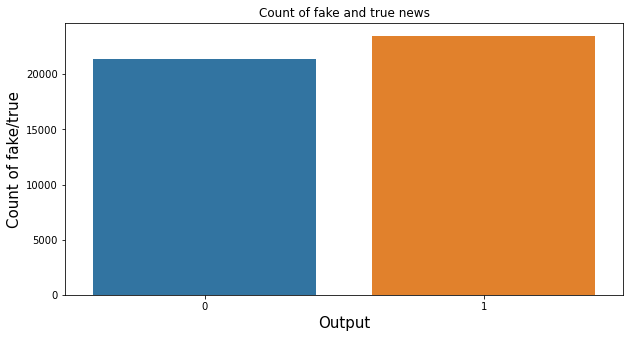

In [24]:
# countplot for fake and real news
ax=sns.countplot(x="label", data=clean_news)

#Setting labels and font size
ax.set(xlabel='Output', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)


The fake news count is quite higher than real news count means our data is not much imbalanced

# Deriving new features from the news¶

Lets extract more features from the news feature such as

    Polarity: The measure which signifies the sentiment of th news
    Review length: Length of the news(number of letters and spaces)
    Word Count: Number of words in the news


In [25]:
import textblob
from textblob import TextBlob


In [26]:
#Extracting the features from the news
clean_news['polarity'] = clean_news['news'].map(lambda text: TextBlob(text).sentiment.polarity)
clean_news['review_len'] = clean_news['news'].astype(str).apply(len)
clean_news['word_count'] = clean_news['news'].apply(lambda x: len(str(x).split()))


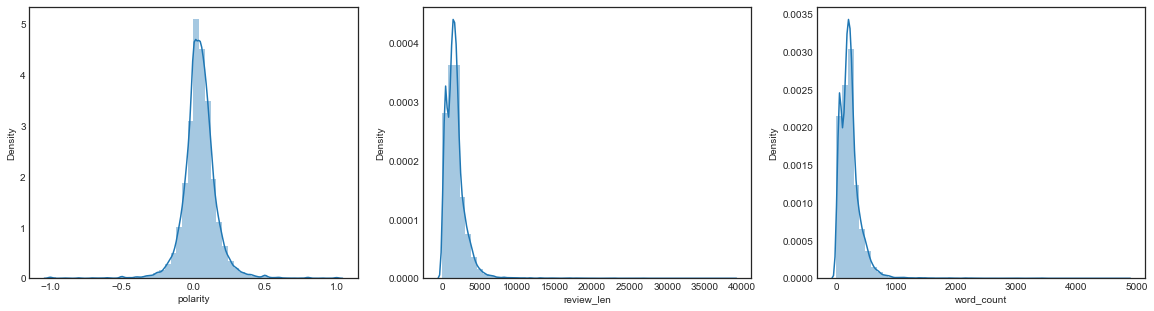

In [27]:
#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(clean_news['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(clean_news['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(clean_news['word_count'])
fig = plt.gcf()

Observations:
1. Most of the polarity are neutral, neither it shows some bad news nor much happy news
2. The word count is between 0-1000 and the length of the news are between 0-5000 and few near 10000 words which could be an        article


# WordCloud of Fake and True NewsS

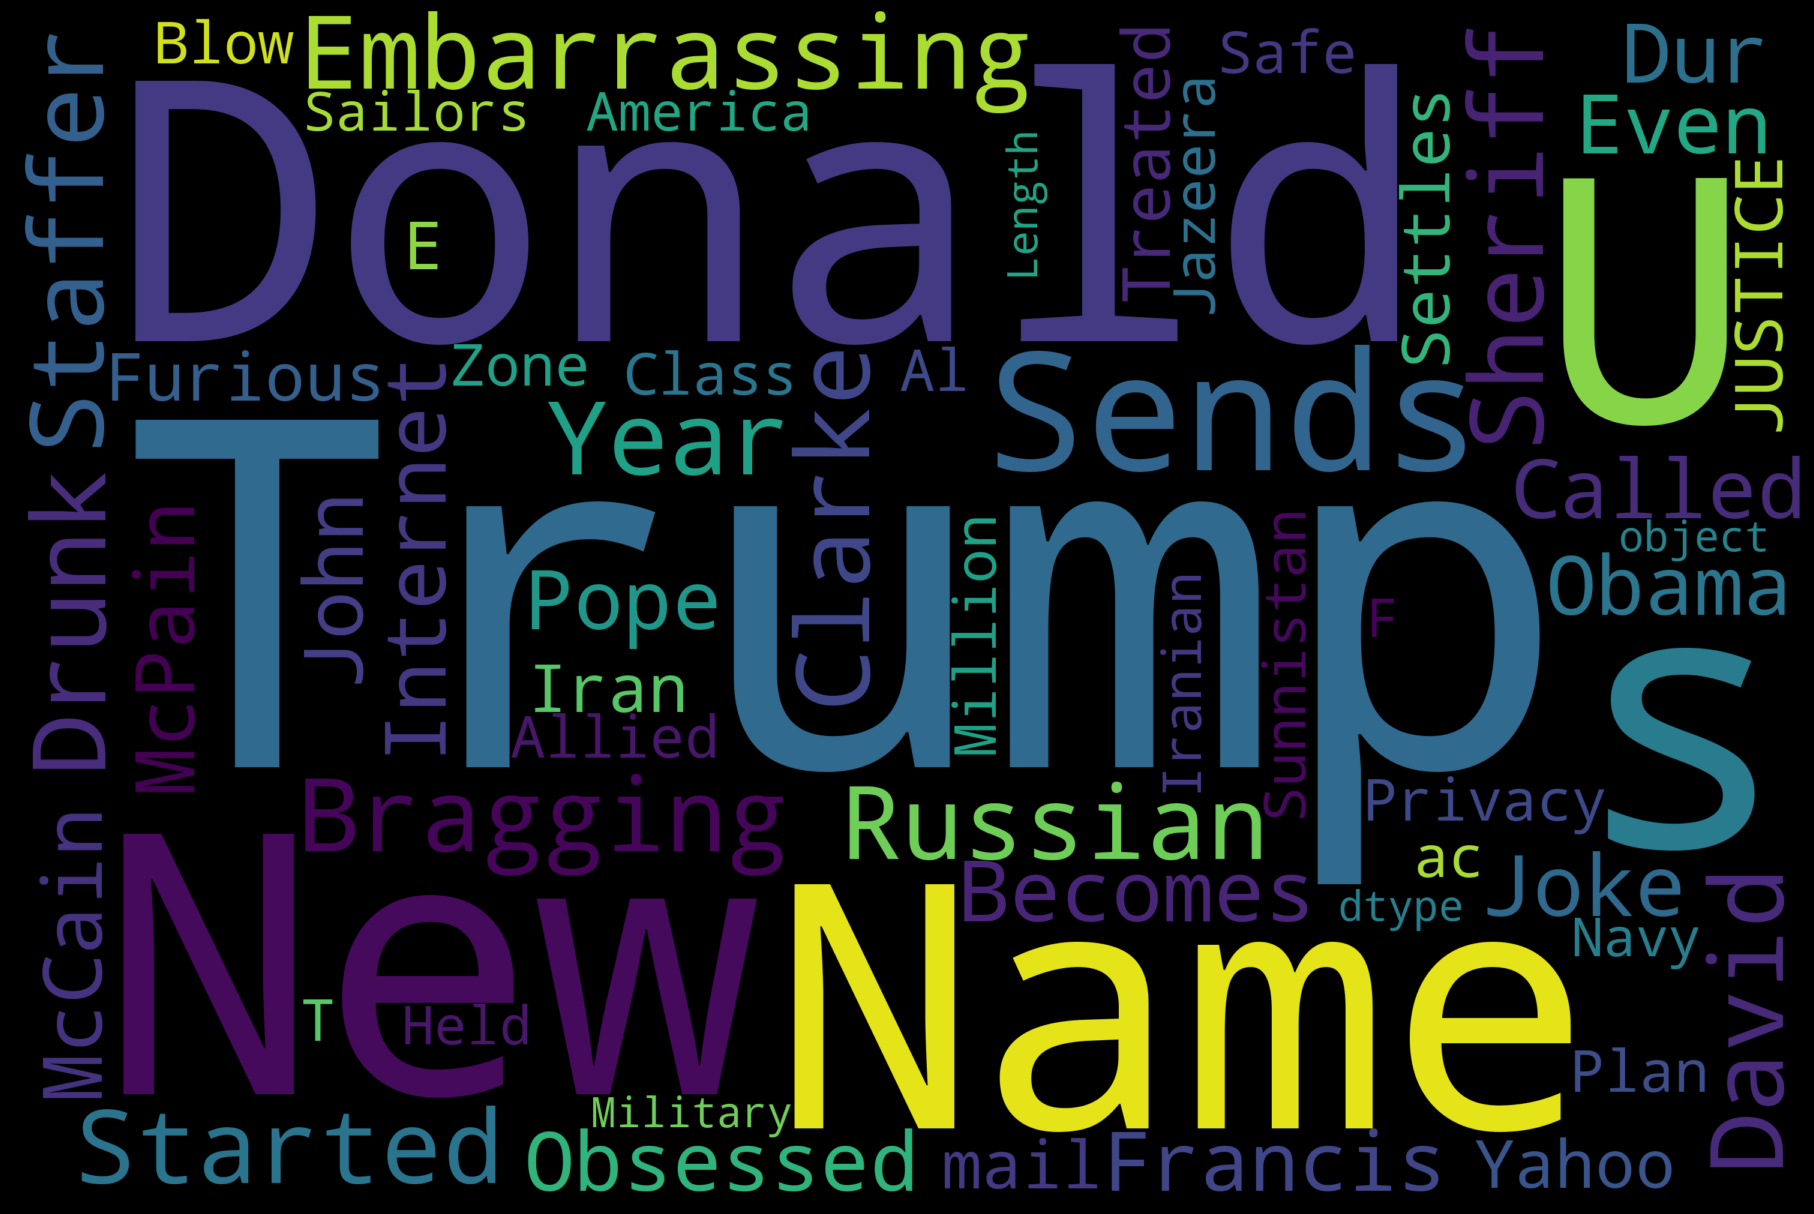

In [28]:
# lets plot wordcloud for fake news data

text = df_fake["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (25, 18),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Observations:
1.Most of the fake news revolves around Donald Trump and America
2.There are also fake news about privacy, internet etc.,


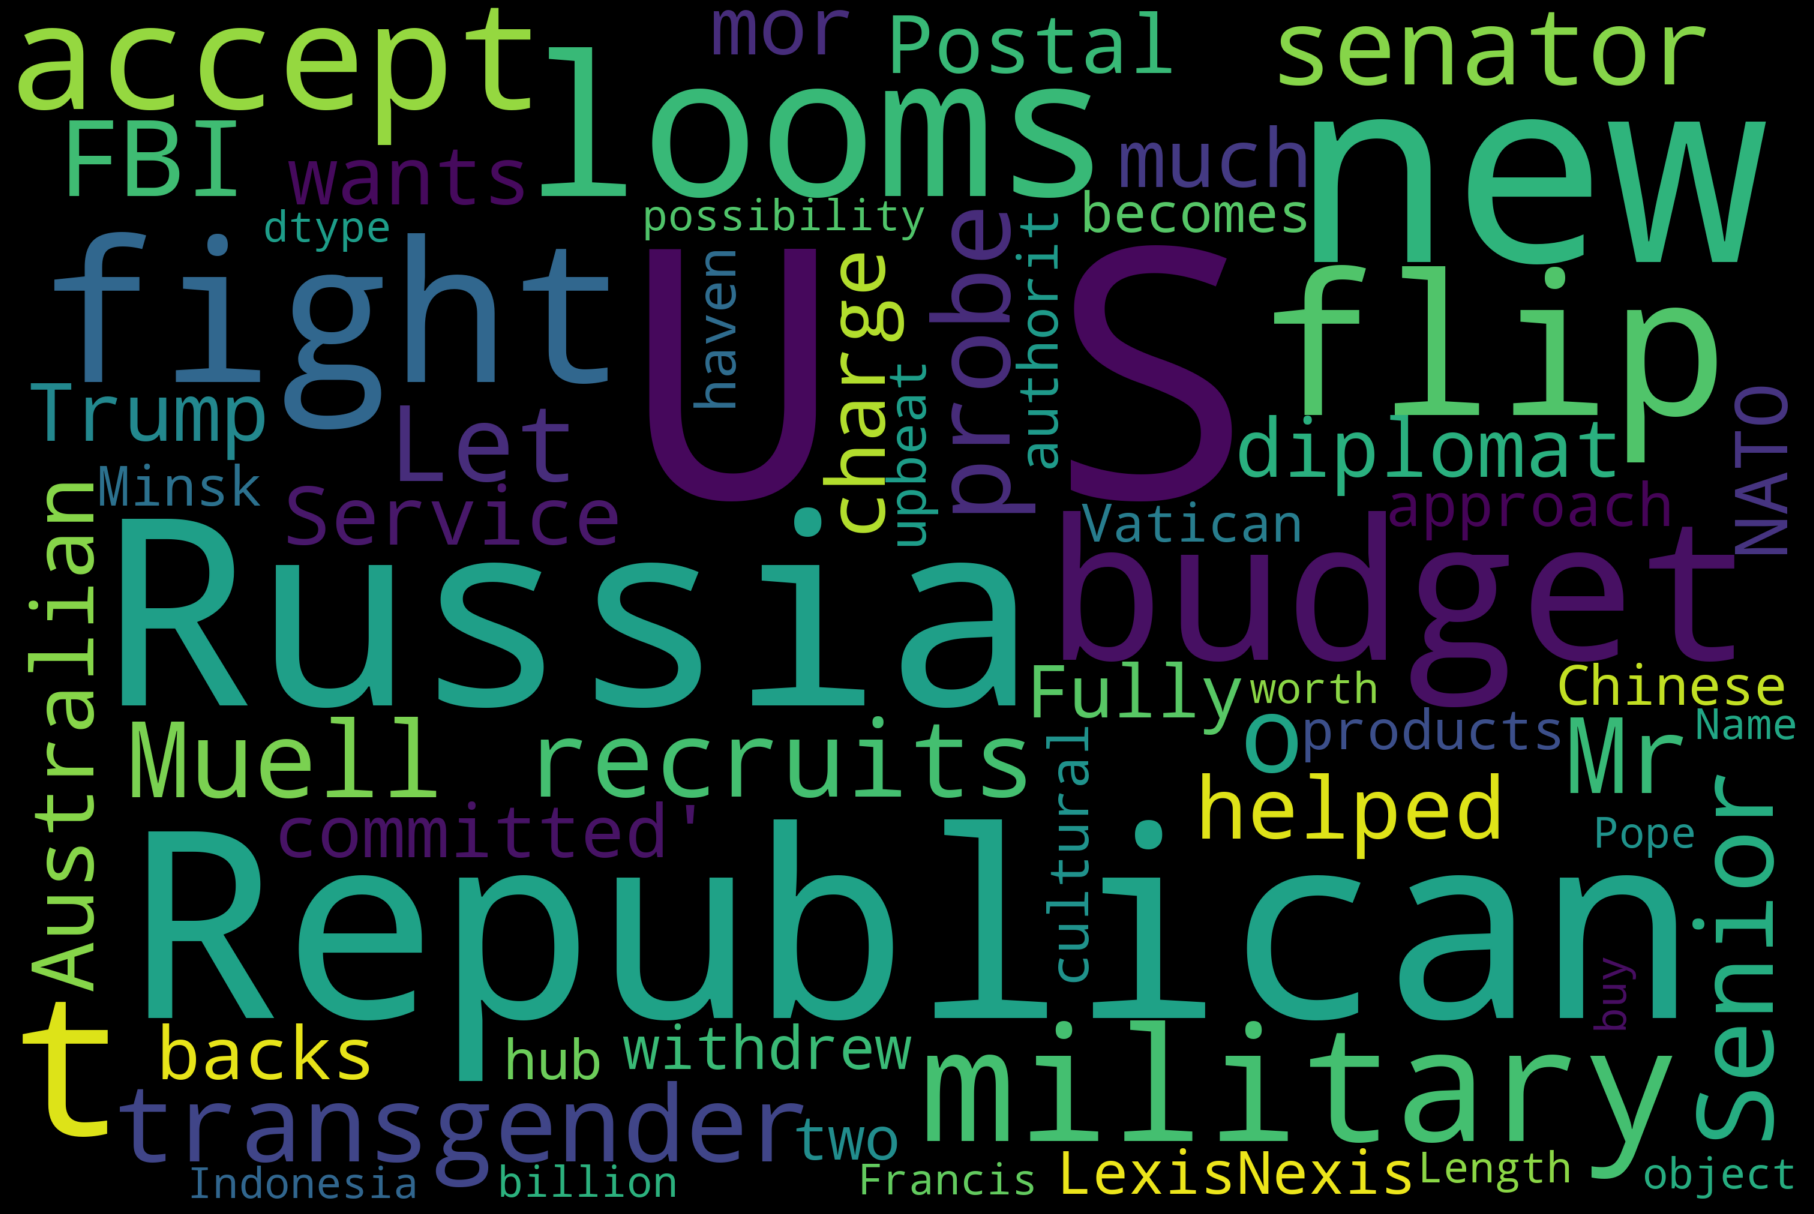

In [29]:
# # lets plot wordcloud for real news data

text = df_real["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (25, 18),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Observations:
1. Real news doesn't involve much trump instead on Republican Party and Russia
2. There are news about Budget,military which comes under government news


# Top 20 words in News

Let's look at the top 20 words from the news which could give us a brief idea on what news are popular in our dataset

In [30]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [31]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(clean_news['news'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df1.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in news')



trump 140400
said 130258
us 68081
would 55422
president 53189
people 41718
one 36146
state 33190
new 31799
also 31209
obama 29881
clinton 29003
house 28716
government 27392
donald 27376
reuters 27348
states 26331
republican 25287
could 24356
white 23823


Observation:
1. All the top 20 news are about the US government
2. Especially it's about Trump and US followed by obama
3. We can understand that the news are from reuters

# Top 2 words in the news

Now let's expand our search to top 2 words from the news

In [32]:
#Function to get top bigram words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_bigram(clean_news['news'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)
    
#Creating the dataframe of word and frequency
df3 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df3.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in news')



donald trump 25059
united states 18394
white house 15485
hillary clinton 9502
new york 8110
north korea 7053
president donald 6928
image via 6188
barack obama 5603
trump said 4816
prime minister 4753
president trump 4646
supreme court 4595
last year 4560
last week 4512
said statement 4425
fox news 4074
president obama 4065
islamic state 4014
national security 3858


Observation:
1. As feared, I think the model will be biased in it's results considering the amount of trump news
2. We can see the north korea news as well, I think it will be about the dispute between US and NK
3. There are also few news from fox news as well


# top trigram words

In [33]:
#Function to get top trigram words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_trigram(clean_news['news'], 20)

#Printing word and their respective frequencies
for word, freq in common_words:
    print(word, freq)

#Creating a dataframe with words and count
df6 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Grouping the words and plotting their frequencies
df6.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in news')



president donald trump 6808
president barack obama 3735
new york times 2034
donald trump realdonaldtrump 1790
reuters president donald 1476
black lives matter 1436
president united states 1096
white house said 1050
presidentelect donald trump 1043
new york city 1006
president vladimir putin 955
news century wire 951
national security adviser 898
affordable care act 868
director james comey 860
speaker paul ryan 851
fbi director james 778
state rex tillerson 775
secretary state rex 765
russian president vladimir 745


Observations:
1.There is an important news which ruled the US media-'Black lives matter' post the demise of Floyd. We can see that news has been covered in our data. There were lot of fake news revolved around the death.
2.Rest of the news are about US politics


# Time series analysis- Fake/True news

Let's look at the timeline of true and fake news that were circulated in the media.

In [34]:
#Creating the count of output based on date
fake=df_fake.groupby(['date'])['label'].count()
fake=pd.DataFrame(fake)

real=df_real.groupby(['date'])['label'].count()
real=pd.DataFrame(real)

#Plotting the time series graph
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=real.index,
         y=real['label'],
         name='Real',
    line=dict(color='blue'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=fake.index,
         y=fake['label'],
         name='Fake',
    line=dict(color='red'),
    opacity=0.8))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
        
    
fig.update_layout(title_text='Real and Fake News',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()

Observations:

1. True news got their dominance since Aug 2017. As they are seen at a very higher rates.That is a good sign
2. There are few outliers in true news where it was higher than the fake news(Nov 9, 2016 and Apr 7, 2017)
3. Our dataset has more fake news than the true one as we can see that we don't have true news data for whole 2015, So the fake    news classification will be pretty accurate than the true news getting classified


# Stemming & Vectorization

# Stemming 

Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word. for example,

    writing->write
    reading->read
    
There is another technique known as Lemmatization where it converts the words into root words which has a semantic meaning. Since it takes time. I'm using stemming


In [35]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['news']].reset_index(drop=True)
news_features.head()

,news
0,us budget fight looms republicans flip fiscal ...
1,us military accept transgender recruits monday...
2,senior us republican senator let mr mueller jo...
3,fbi russia probe helped australian diplomat ti...
4,trump wants postal service charge much amazon ...


In [36]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)#Getting the target variable
y=clean_news['label']

In [37]:
corpus[1]

'us militari accept transgend recruit monday pentagonwashington reuter transgend peopl allow first time enlist us militari start monday order feder court pentagon said friday presid donald trump administr decid appeal rule block transgend ban two feder appeal court one washington one virginia last week reject administr request put hold order lower court judg requir militari begin accept transgend recruit jan justic depart offici said administr challeng rule depart defens announc releas independ studi issu come week rather litig interim appeal occur administr decid wait dod studi continu defend presid law author district court meantim offici said speak condit anonym septemb pentagon said creat panel senior offici studi implement direct trump prohibit transgend individu serv defens depart feb submit plan trump lawyer repres currentlyserv transgend servic member aspir recruit said expect administr appeal rule conservativemajor suprem court hope would happen pentagon spokeswoman heather ba

This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1's and 0's. To encode it we use TFIDF


# TFIDF(Term Frequency — Inverse Document Frequency)¶

This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the news.

In [38]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['news'])
X.shape

(44888, 5000)

As we have considered 5000 words, we can confirm that we have 5000 columns from the shape.

In [39]:
#Getting the target variable
y=clean_news['label']

# Checking for balance of data

We should be careful about when handling imbalance data. If it is imbalanced, the model will be biased towards the higher frequency class and returns max output

In [40]:
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({1: 23471, 0: 21417})


Our dataset is nearly a balanced one. So let's leave balancing it.

# Train-test split

Using train test split function we are splitting the dataset into 70:30 ratio for train and test set respectively.

In [41]:
# Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Model Building

As we have successfully processed the text data, not it is just a normal machine learning problem. Where from the sparse matrix we predict the classes in target feature.

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()


    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model Selection


First select the best performing model by using cross validation. Let's consider all the classification algorithm and perform the model selection process


In [43]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))


Logistic Regression Test Accuracy: 0.9659594665748598
Decision Tree Test Accuracy: 0.9349930549185592
KNN Test Accuracy: 0.6134179152128256
Naive Bayes Test Accuracy: 0.9373105638699313


From the results, we can see logistic regression outdone the rest of the algorithms followed by Naive Bayes and Decision Tree.That's great. So let's go with logistic regression with hyperparameter tuning.

# Hyperparameter Tuning

We use regularization parameter and penality for parameter tuning. let's see which one to plug.

In [44]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=24.420530945486497, random_state=0)
The mean accuracy of the model is: 0.9809163139526249


In [45]:
logreg = LogisticRegression(C=24.420530945486497, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


We have got 98% accuracy. As already discussed before this is a biased dataset and we can easily get such higher accuracy without any effort in processing it. But for classification problems we need to get confusion matrix and check f1 score rather than accuracy

# Confusion Matrix

Confusion matrix, without normalization


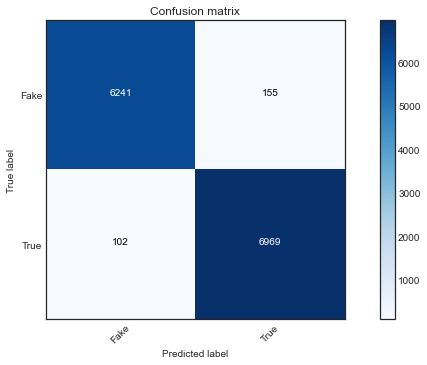

In [46]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','True'])

Check out the diagonal elements(6241+6969), they are correctly predicted records and rest are incorrectly classified by the algorithm. Our model has done well(results are good by the data is biased :P)

# Classification Report

Considering Fake news, we should seriously consider precision score (False positive). We can't afford the mistakes when the model classifies fake news as true which will lead to chaos

In [47]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      6396
           1       0.98      0.99      0.98      7071

    accuracy                           0.98     13467
   macro avg       0.98      0.98      0.98     13467
weighted avg       0.98      0.98      0.98     13467



All our scores are 98%. Certainly unreal to get such values. There are only changes in the support.

# ROC-AUC Curve

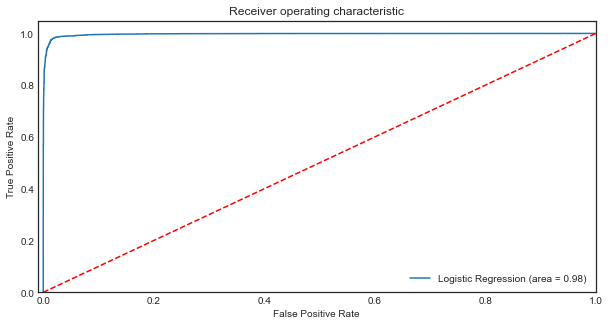

In [48]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

We should consider the AUC score here which is 98%. Very well. All metrics are performing good. The more far left the curve is better our model We can adjust our threshold based on our ROC curve to get results based on model requirements

# Deep learning-LSTM

in this part we use neural network to predict whether the given news is fake or not.

LSTM(long short term memory) helps in containing sequence information.Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more.

# One hot for Embedding layers

While onehot encoding the words in sentences will take the index from the vocabulary size. Let's fix the vocabulary size to 10000

In [49]:
corpus[1]

'us militari accept transgend recruit monday pentagonwashington reuter transgend peopl allow first time enlist us militari start monday order feder court pentagon said friday presid donald trump administr decid appeal rule block transgend ban two feder appeal court one washington one virginia last week reject administr request put hold order lower court judg requir militari begin accept transgend recruit jan justic depart offici said administr challeng rule depart defens announc releas independ studi issu come week rather litig interim appeal occur administr decid wait dod studi continu defend presid law author district court meantim offici said speak condit anonym septemb pentagon said creat panel senior offici studi implement direct trump prohibit transgend individu serv defens depart feb submit plan trump lawyer repres currentlyserv transgend servic member aspir recruit said expect administr appeal rule conservativemajor suprem court hope would happen pentagon spokeswoman heather ba

In [50]:
#Setting up vocabulary size
voc_size=10000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

We can see all the words in the sentences are transformed into their index from the vocabulary we created.

All the neural networks require to have inputs that have the same shape and size. However, when we pre-process and use the texts as inputs for our LSTM model, not all the sentences have the same length. In other words, naturally, some of the sentences are longer or shorter. We need to have the inputs with the same size, this is where the padding is necessary. Here we take the common length as 5000 and perform padding using pad_sequence() function . Also we are going to 'pre' pad so that zeros are added before the sentences to make the sentence of equal length

In [51]:
#Setting sentence length
sent_length=5000

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4648 4388 3894]
 [   0    0    0 ...   21 4034 2708]
 [   0    0    0 ... 4303 6844 3906]
 ...
 [   0    0    0 ... 8417 9535 9578]
 [   0    0    0 ... 8417 6972 7918]
 [   0    0    0 ... 8417 2488 9578]]


In [52]:
embedded_docs[1]

array([   0,    0,    0, ...,   21, 4034, 2708])

# LSTM Model

At first we are going to develop the base model and compile it. The first layer will be the embedding layer which has the input of vocabulary size, vector features and sentence length. Later we add 30% dropout layer to prevent overfitting and the LSTM layer which has 100 neurons in the layer.In final layer we use sigmoid activation function. Later we compile the model using adam optimizer and binary cross entropy as loss function since we have only two outputs.

In [53]:
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(10)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 40)          400000    
                                                                 
 dropout (Dropout)           (None, 5000, 40)          0         
                                                                 
 lstm (LSTM)                 (None, 10)                2040      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 402,051
Trainable params: 402,051
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
len(embedded_docs),y.shape

(44888, (44888,))

# Fitting the LSTM Model

Before fitting to the model, let's consider the padded embedded object as X and y as y itself and convert them into an array.

In [56]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((44888, 5000), (44888,))

Let's split our new X and y variable into train and test and proceed with fitting the model to the data. We have considered 10 epochs and 64 as batch size. It can be varied to get better results.


In [57]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Fitting with 10 epochs and 64 batch size
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
470/470 [==============================] - 3690s 8s/step - loss: 0.2709 - accuracy: 0.9111 - val_loss: 0.1236 - val_accuracy: 0.9658
Epoch 2/10
470/470 [==============================] - 5911s 13s/step - loss: 0.0988 - accuracy: 0.9736 - val_loss: 0.0920 - val_accuracy: 0.9728
Epoch 3/10
470/470 [==============================] - 5089s 11s/step - loss: 0.0727 - accuracy: 0.9796 - val_loss: 0.0852 - val_accuracy: 0.9729
Epoch 4/10
470/470 [==============================] - 2182s 5s/step - loss: 0.0506 - accuracy: 0.9861 - val_loss: 0.0762 - val_accuracy: 0.9765
Epoch 5/10
470/470 [==============================] - 2007s 4s/step - loss: 0.0398 - accuracy: 0.9895 - val_loss: 0.0722 - val_accuracy: 0.9795
Epoch 6/10
470/470 [==============================] - 1979s 4s/step - loss: 0.0458 - accuracy: 0.9864 - val_loss: 0.0846 - val_accuracy: 0.9760
Epoch 7/10
470/470 [==============================] - 1998s 4s/step - loss: 0.0284 - accuracy: 0.9925 - val_loss: 0.0722 - val_accurac

# Evaluation of model

In [63]:
y_predict = np.argmax(model.predict(X_test), axis=1)

463/463 [==============================] - 659s 1s/step


Confusion matrix, without normalization


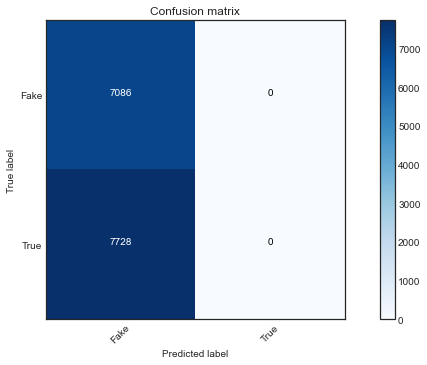

In [64]:
#Creating confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm,classes=['Fake','True'])

In [65]:
#Checking for accuracy
accuracy_score(y_test,y_predict)

0.4783313082219522

We have got an accuracy of 47.83%.

In [66]:
# Creating classification report 
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65      7086
           1       0.00      0.00      0.00      7728

    accuracy                           0.48     14814
   macro avg       0.24      0.50      0.32     14814
weighted avg       0.23      0.48      0.31     14814



From the classification report we can see the accuracy value is nearly around 48%.